# Predict flight delays by creating a Machine Learning Model  



In [1]:
# importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Accent')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing a dataset
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0   521k      0  0:00:02  0:00:02 --:--:--  521k


In [3]:
# loading the dataset
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


> ## **Column Description**

<ul>
<li><b>YEAR</b> - Year that the flight took place</li> 
<li><b>QUARTER</b>	- Quarter that the flight took place (1-4)</li>
<li><b>MONTH</b> - Month that the flight took place (1-12)</li>
<li><b>DAY_OF_MONTH</b> - Day of the month that the flight took place (1-31)</li>
<li><b>DAY_OF_WEEK</b>	- Day of the week that the flight took place (1=Monday, 2=Tuesday, etc.)</li>
<li><b>UNIQUE_CARRIER</b> - Airline carrier code (e.g., DL)</li>
<li><b>TAIL_NUM</b> - Aircraft tail number</li>
<li><b>FL_NUM</b> - Flight number</li>
<li><b>ORIGIN_AIRPORT_ID</b> - ID of the airport of origin</li>
<li><b>ORIGIN</b> - Origin airport code (ATL, DFW, SEA, etc.)</li>
<li><b>DEST_AIRPORT_ID</b> - ID of the destination airport</li>
<li><b>DEST</b> - Destination airport code (ATL, DFW, SEA, etc.)</li>
<li><b>CRS_DEP_TIME</b> - Scheduled departure time</li>
<li><b>DEP_TIME</b> - Actual departure time</li>
<li><b>DEP_DELAY</b> - Number of minutes departure was delayed</li>
<li><b>DEP_DEL15</b> - 0=Departure delayed less than 15 minutes, 1=Departure delayed 15 minutes or more</li>
<li><b>CRS_ARR_TIME</b> - Scheduled arrival time</li>
<li><b>ARR_TIME</b> - Actual arrival time</li>
<li><b>ARR_DELAY</b> - Number of minutes flight arrived late</li>
<li><b>ARR_DEL15</b> -  0=Arrived less than 15 minutes late, 1=Arrived 15 minutes or more late</li>
<li><b>CANCELLED</b> - 0=Flight was not cancelled, 1=Flight was cancelled</li>
<li><b>DIVERTED</b> - 0=Flight was not diverted, 1=Flight was diverted</li>
<li><b>CRS_ELAPSED_TIME</b> - Scheduled flight time in minutes</li>
<li><b>ACTUAL_ELAPSED_TIME</b> - Actual flight time in minutes</li>
<li><b>DISTANCE</b> - Distance traveled in miles</li> </ul>

## Clean and prepare data

In [4]:
print('Dimensionality of the DataFrame:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

Dimensionality of the DataFrame:
Linhas:  11231
Colunas:  26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [6]:
# checking for missing values
df.isnull().values.any()

True

In [7]:
# number of missing values in each column
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [8]:
# removing column 26
df.drop('Unnamed: 25', axis=1, inplace=True)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [9]:
# the filtered DataFrame
df = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'ARR_DEL15']]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [10]:
# rows with missing values
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [11]:
# NaNs replaced with 1s
df.fillna({'ARR_DEL15': 1}, inplace=True)
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [12]:
# observe that the CRS_DEP_TIME column contains values from 0 to 2359 representing military times.
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [13]:
# the DataFrame with binned departure times
for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [14]:
# descriptive statistics
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,6.628973,15.790758,3.960199,12.939186,0.139168
std,3.354678,8.782056,1.995257,4.887528,0.346138
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,9.000000,0.000000
50%,7.000000,16.000000,4.000000,13.000000,0.000000
75%,9.000000,23.000000,6.000000,17.000000,0.000000
max,12.000000,31.000000,7.000000,23.000000,1.000000


## Graphical Analysis

Flights Arrival:
0.0    0.860832
1.0    0.139168
Name: ARR_DEL15, dtype: float64


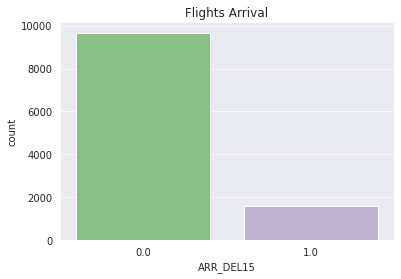

In [15]:
# percentage of flights 
# 0=Arrived less than 15 minutes late, 1=Arrived 15 minutes or more late
print('Flights Arrival:')
print(df['ARR_DEL15'].value_counts() / len(df['ARR_DEL15']))
ax = sns.countplot(x='ARR_DEL15', data=df)
ax.set_title('Flights Arrival')
ax;

In [16]:
# correlation of columns
corr = df.corr()
corr

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15
MONTH,1.000000,0.003095,-0.005027,0.020570,0.017248
DAY_OF_MONTH,0.003095,1.000000,0.010415,0.009411,-0.006912
DAY_OF_WEEK,-0.005027,0.010415,1.000000,0.005231,-0.016993
CRS_DEP_TIME,0.020570,0.009411,0.005231,1.000000,0.078641
ARR_DEL15,0.017248,-0.006912,-0.016993,0.078641,1.000000


## Data Preparation

In [17]:
# the DataFrame with indicator columns
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
SEED = 42
np.random.seed(SEED)

X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
print(f'X_train: {X_train.shape[0]}')
print(f'X_test: {X_test.shape[0]}')
print(f'y_train: {y_train.shape[0]}')
print(f'y_test: {y_test.shape[0]}')

X_train: 8984
X_test: 2247
y_train: 8984
y_test: 2247


## Build Machine Learning Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# training the model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Measure the accuracy

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# testing the model
y_predict = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'[Accuracy] Random Forest: {accuracy}')

# generating an AUC score
probabilities = model.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])
print(f'[Roc_Auc]: {roc_auc_score(y_test, probabilities[:, 1])}')

# generating a confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_predict), 
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

[Accuracy] Random Forest: 0.855807743658211
[Roc_Auc]: 0.6653390821397251


,pred_neg,pred_pos
neg,1885,51
pos,273,38


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# measuring precision
train_predictions = model.predict(X_train)
print(f'[Precision Score]: {precision_score(y_train, train_predictions)}')

# measuring recall
print(f'[Recall]: {recall_score(y_train, train_predictions)}')

[Precision Score]: 0.9971830985915493
[Recall]: 0.8482428115015974


## Visualize Output of Model

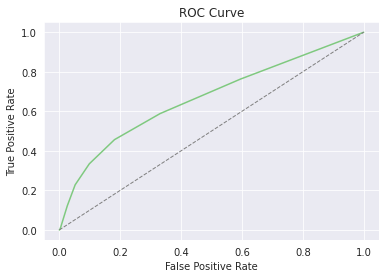

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [0]:
# function that calls the machine-learning model to compute the likelihood that a flight will be on time

def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return print('Probability of On-Time Arrival: {}%'.format(model.predict_proba(pd.DataFrame(input))[0][0] * 100))

In [30]:
# creating simulations 

predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

Probability of On-Time Arrival: 70.0%


In [26]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

Probability of On-Time Arrival: 80.0%


In [27]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

Probability of On-Time Arrival: 90.0%
